### Project Title

#### Air Quality Health Risk Prediction Using Machine Learning

#### 📌 Project Overview

Air pollution has become one of the most critical environmental issues impacting human health. Exposure to pollutants such as PM2.5, PM10, NO₂, SO₂, CO, and O₃ can significantly increase the risk of respiratory illness, cardiovascular disease, and overall health deterioration.
This project focuses on predicting the Health Risk Level (Low, Moderate, High, Very High) based on multiple air quality parameters collected from environmental monitoring systems.Using machine learning algorithms,
the goal is to classify the level of health risk for a given set of pollution measurements and help individuals or authorities take preventive measures in real time.

#### 🎯 Objective of the Project

To build a machine learning-based classification system that predicts health risk levels based on air quality data.

To analyze pollutant behavior and understand which features contribute most to air quality deterioration.

To evaluate multiple ML models including
 Logistic Regression, 
 K-Nearest Neighbors, 
 Support Vector Machine, 
 Random Forest, 
 Gradient Boosting

To identify the best-performing model using:
Accuracy Score, 
Confusion Matrix, 
Scatter Plot (Actual vs Predicted), 
Distribution Plot (Displot), 

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    

In [3]:
# Load dataset
df = pd.read_csv("AirQualityData.csv")
df.head()

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4000 non-null   object 
 1   Time                 4000 non-null   object 
 2   CO(GT)               4000 non-null   float64
 3   NOx(GT)              4000 non-null   float64
 4   NO2(GT)              4000 non-null   float64
 5   O3(GT)               4000 non-null   float64
 6   SO2(GT)              4000 non-null   float64
 7   PM2.5                4000 non-null   float64
 8   PM10                 4000 non-null   float64
 9   Temperature          4000 non-null   float64
 10  Humidity             4000 non-null   float64
 11  Pressure             4000 non-null   float64
 12  WindSpeed            4000 non-null   float64
 13  WindDirection        4000 non-null   float64
 14  CO_NOx_Ratio         4000 non-null   float64
 15  NOx_NO2_Ratio        4000 non-null   f

In [5]:
# Shape of dataset
df.shape

(4000, 23)

In [6]:
# Drop columns not needed
df = df.drop(columns=["Date", "Time", "CO_MA3", "NO2_MA3", "O3_MA3"])

In [7]:
# Missing values
df.isnull().sum()

CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0
CO_NOx_Ratio           0
NOx_NO2_Ratio          0
Temp_Humidity_Index    0
AirQualityIndex        0
DayOfWeek              0
Hour                   0
dtype: int64

In [8]:
# Create Health_Risk_Level Column
def get_health_risk(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 200:
        return "Poor"
    elif aqi <= 300:
        return "Very Poor"
    else:
        return "Hazardous"

df["Health_Risk_Level"] = df["AirQualityIndex"].apply(get_health_risk)

# Check new column
df[["AirQualityIndex", "Health_Risk_Level"]].head()

# Check distribution of classes
df["Health_Risk_Level"].value_counts()

Health_Risk_Level
Hazardous    1619
Poor          804
Very Poor     788
Moderate      404
Good          385
Name: count, dtype: int64

#### Exploratory Data Analysis (EDA)

##### Correlation Heatmap

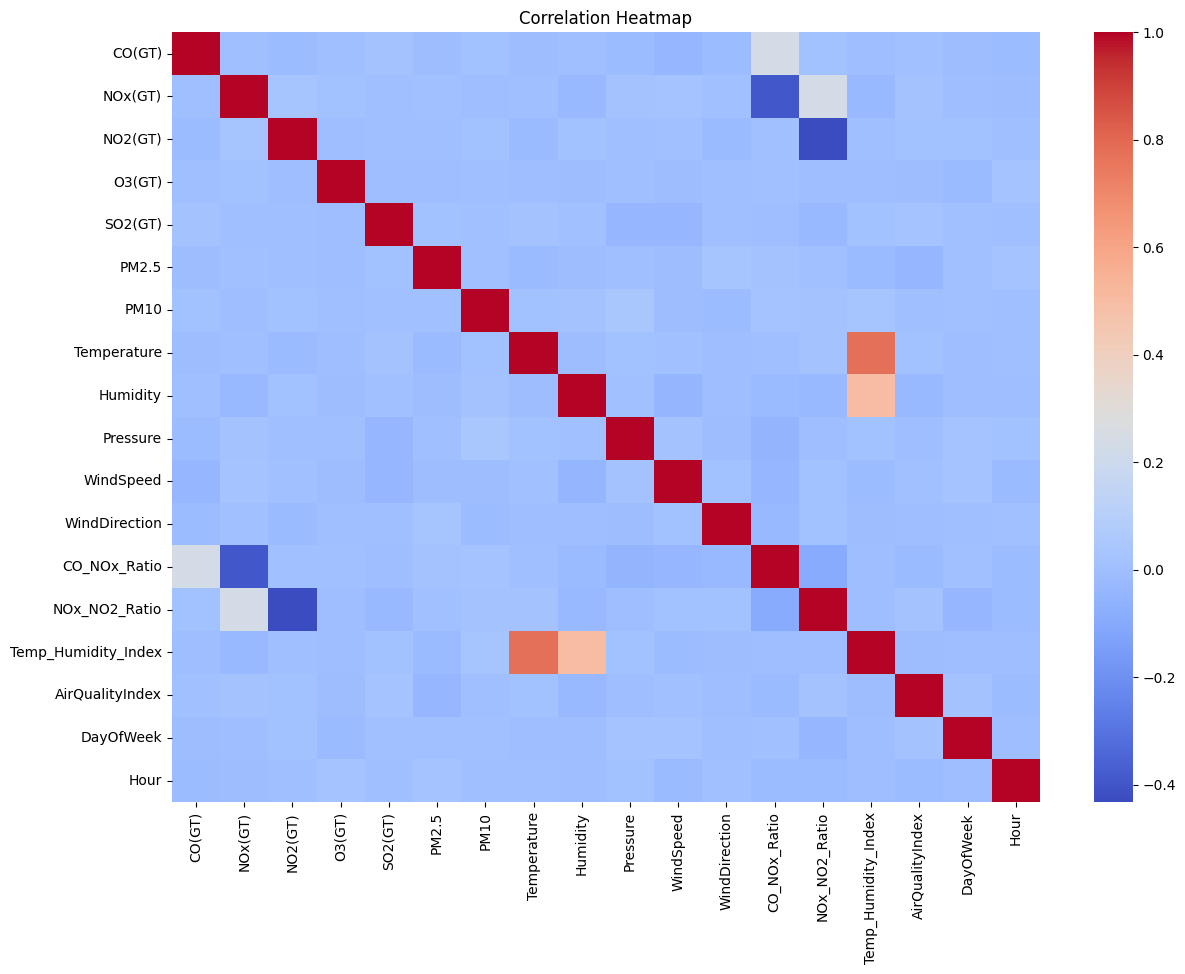

In [9]:
# Correlation heatmap 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Distribution of Air Quality Index

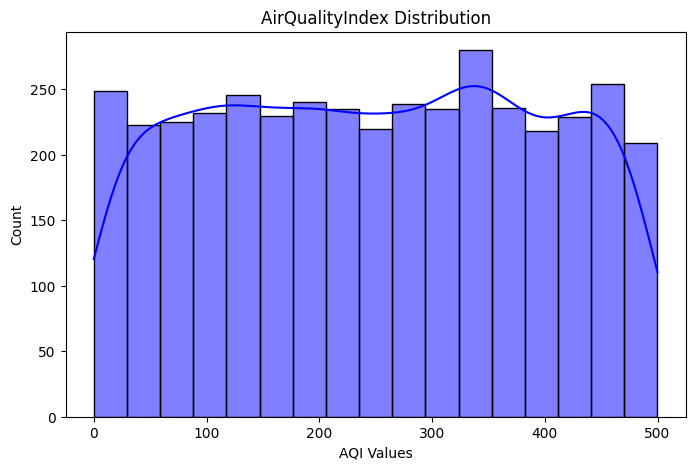

In [10]:
# Distribution of AQI
plt.figure(figsize=(8,5))
sns.histplot(df["AirQualityIndex"], kde=True, color='blue')
plt.title("AirQualityIndex Distribution")
plt.xlabel("AQI Values")
plt.ylabel("Count")
plt.show()

#### PM2.5 vs AQI Scatter Plot

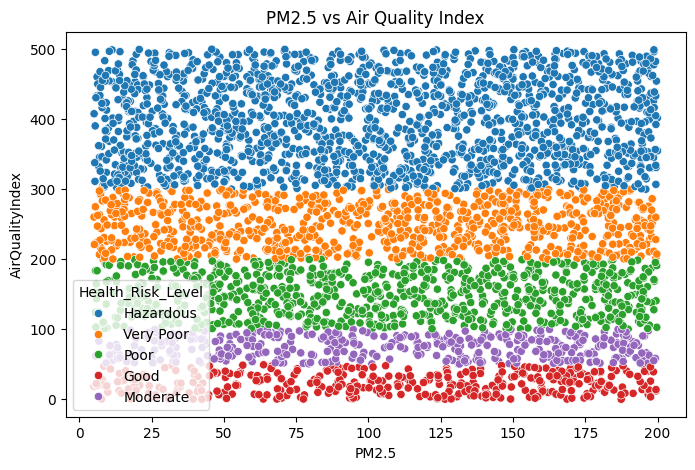

In [11]:
# PM2.5 vs AQI
plt.figure(figsize=(8,5))
sns.scatterplot(x="PM2.5", y="AirQualityIndex", hue="Health_Risk_Level", data=df)
plt.title("PM2.5 vs Air Quality Index")
plt.show()

#### PM10 vs AQI Scatter Plot

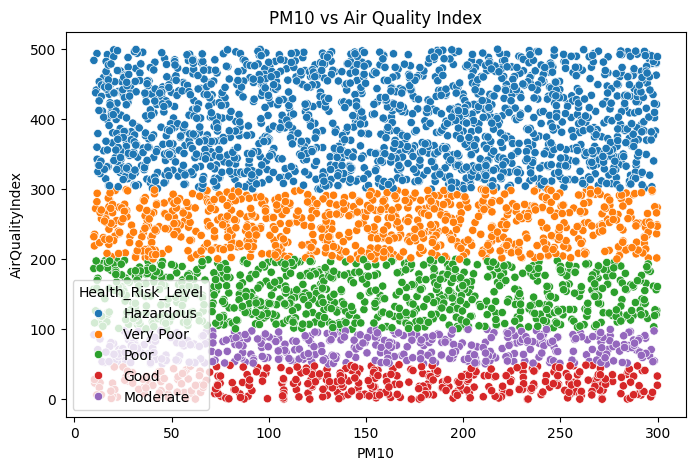

In [12]:
# PM10 vs AQI
plt.figure(figsize=(8,5))
sns.scatterplot(x="PM10", y="AirQualityIndex", hue="Health_Risk_Level", data=df)
plt.title("PM10 vs Air Quality Index")
plt.show()

#### Check Outliers (Boxplots)

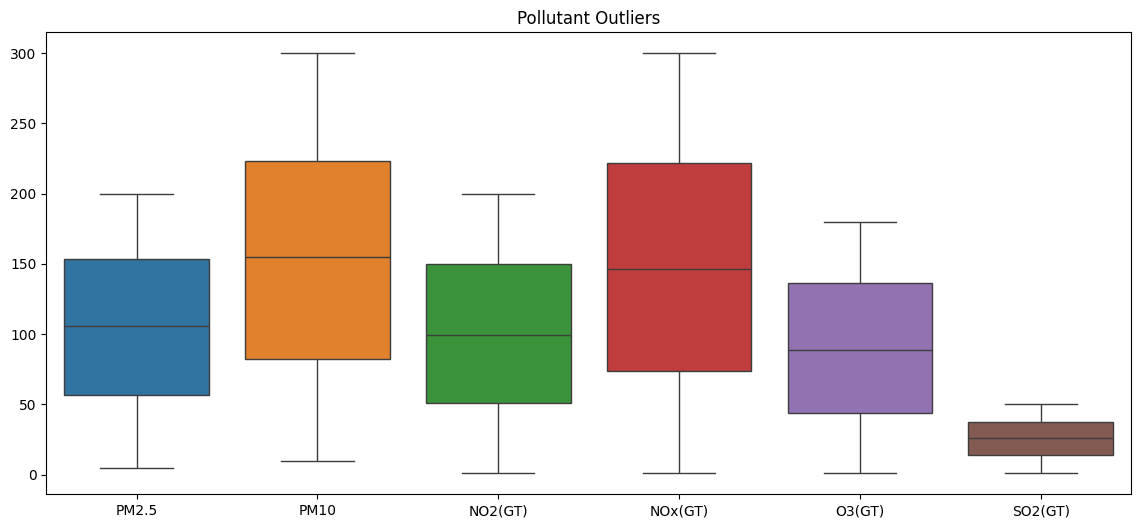

In [13]:
# Boxplot for pollutants
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[["PM2.5", "PM10", "NO2(GT)", "NOx(GT)", "O3(GT)", "SO2(GT)"]])
plt.title("Pollutant Outliers")
plt.show()

#### Encoding 

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode target label
le = LabelEncoder()
df["Health_Risk_Level_Encoded"] = le.fit_transform(df["Health_Risk_Level"])

In [15]:
# Define features (X) and target (y)
X = df[[
    "CO(GT)", "NOx(GT)", "NO2(GT)", "O3(GT)", "SO2(GT)", "PM2.5", "PM10",
    "Temperature", "Humidity", "Pressure", "WindSpeed", "WindDirection",
    "CO_NOx_Ratio", "NOx_NO2_Ratio", "Temp_Humidity_Index",
    "AirQualityIndex", "DayOfWeek", "Hour"
]]

y = df["Health_Risk_Level_Encoded"]

#### Scale numeric features

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#### Train Multiple ML Models & Compare Accuracy

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

#### Logistic Regression

In [32]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

#### KNN

In [33]:
# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

#### SVM

In [34]:
# SVM
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

#### Random Forest

In [35]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

####  Gradient Boosting

In [36]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

In [37]:
# Show accuracy of all models
print("Logistic Regression Accuracy:", lr_acc)
print("KNN Accuracy:", knn_acc)
print("SVM Accuracy:", svm_acc)
print("Random Forest Accuracy:", rf_acc)
print("Gradient Boost Accuracy:", gb_acc)

Logistic Regression Accuracy: 0.975
KNN Accuracy: 0.5575
SVM Accuracy: 0.87
Random Forest Accuracy: 0.99875
Gradient Boost Accuracy: 0.99875


In [38]:
# Classification Report (Best Model: Random Forest)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_pred))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00        81
           3       1.00      0.99      1.00       161
           4       0.99      1.00      1.00       157

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [39]:
# Confusion Matrix (Random Forest)
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, rf_pred))


Confusion Matrix (Random Forest):
[[ 77   0   0   0   0]
 [  0 324   0   0   0]
 [  0   0  81   0   0]
 [  0   0   0 160   1]
 [  0   0   0   0 157]]


#### Save Model, Scaler, Label Encoder

In [40]:
# Import joblib for saving models
import joblib

# Save the best model (Random Forest)
joblib.dump(rf, "aqi_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the label encoder
joblib.dump(le, "label_encoder.pkl")

print("Model, Scaler, and Label Encoder saved successfully!")

Model, Scaler, and Label Encoder saved successfully!


In [41]:
model_names = ["Logistic Regression", "KNN", "SVM", "Random Forest", "Gradient Boosting"]
accuracies = [lr_acc, knn_acc, svm_acc, rf_acc, gb_acc]

accuracy_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies
})

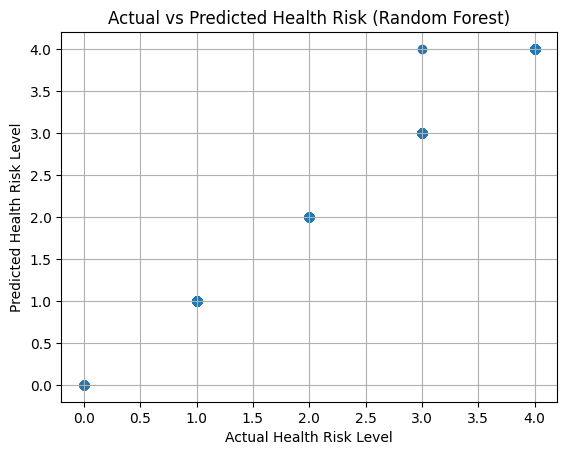

In [44]:
plt.figure()
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Health Risk Level")
plt.ylabel("Predicted Health Risk Level")
plt.title("Actual vs Predicted Health Risk (Random Forest)")
plt.grid(True)
plt.show()